<a href="https://colab.research.google.com/github/vijayamurugan27/30-Days-Of-JavaScript/blob/master/Copy_of_Reading_info_from_Tables_Modern_AI_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern AI Pro: Reading Info from Tables
Modern documents have a lotof tables and the textual content is not easy to extract in conventional ways. We will use the state of the art transformers. Very useful for RPA and other applications

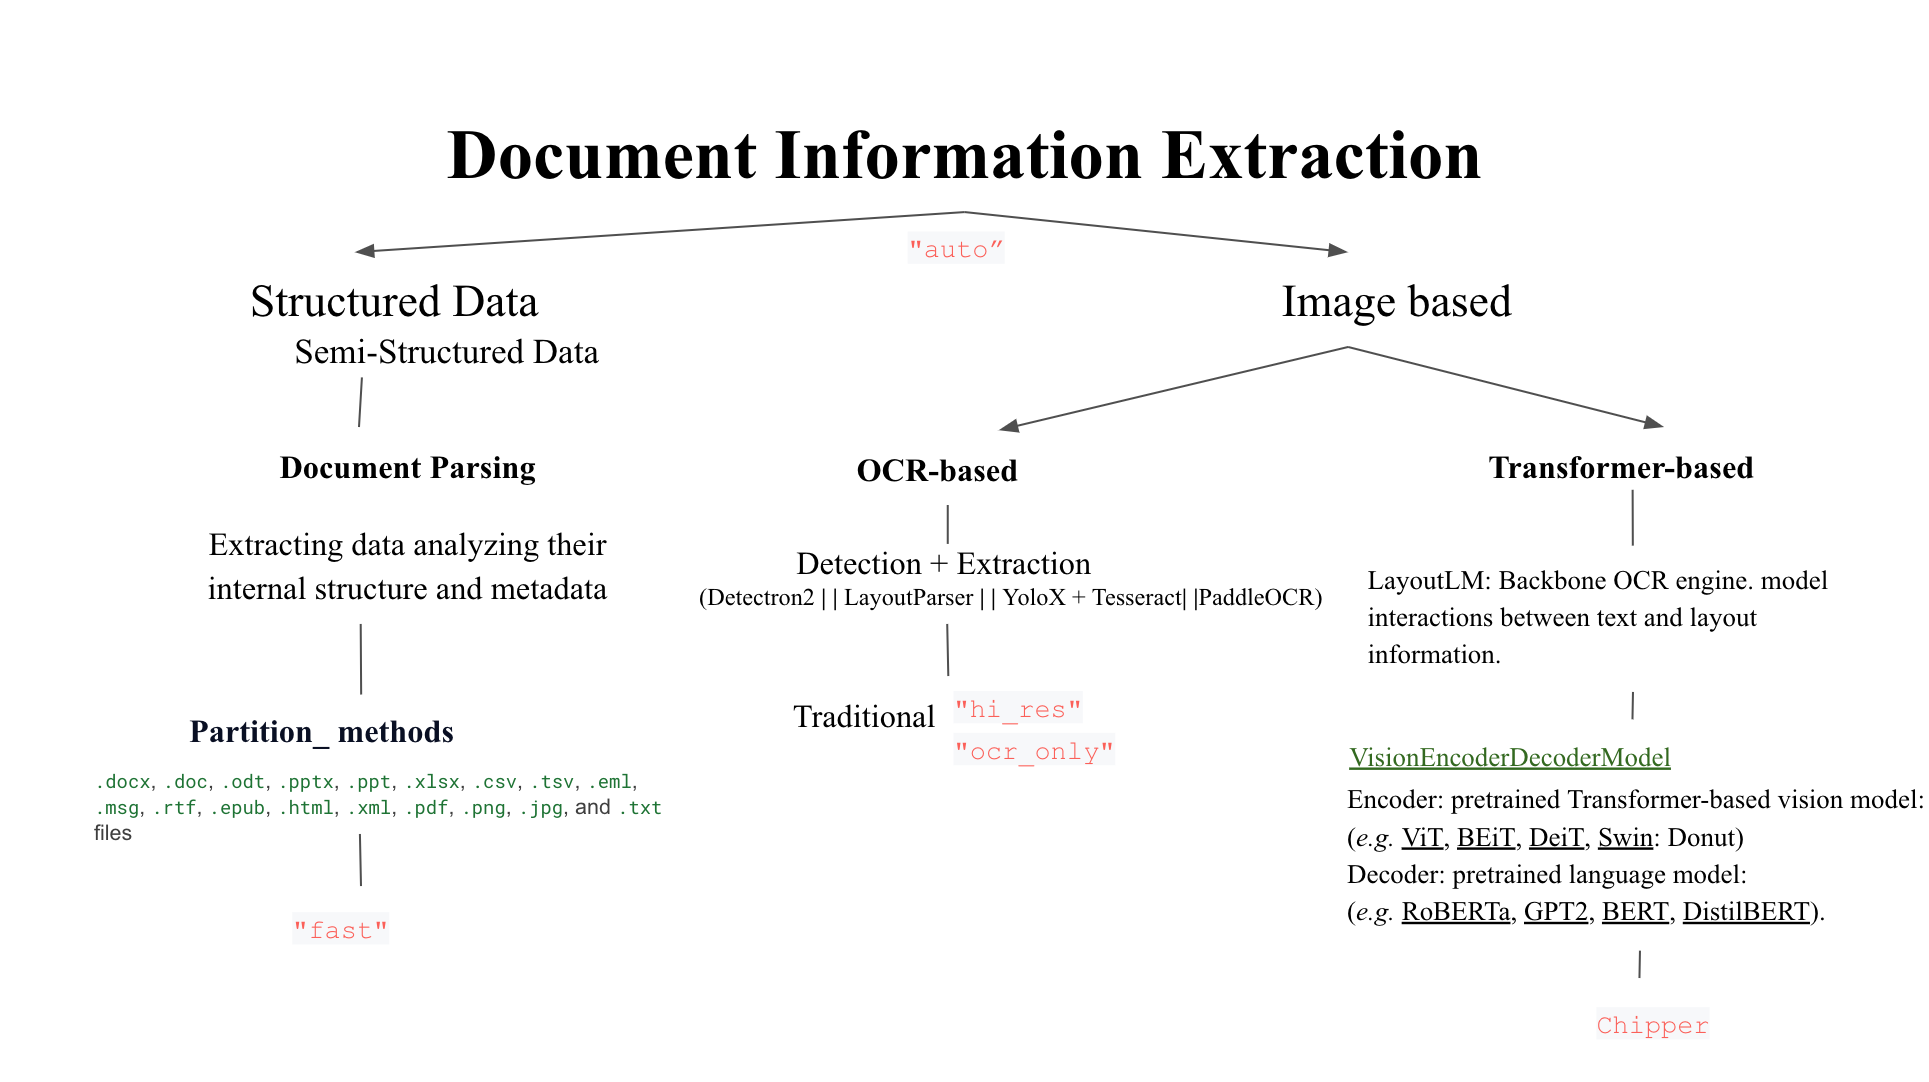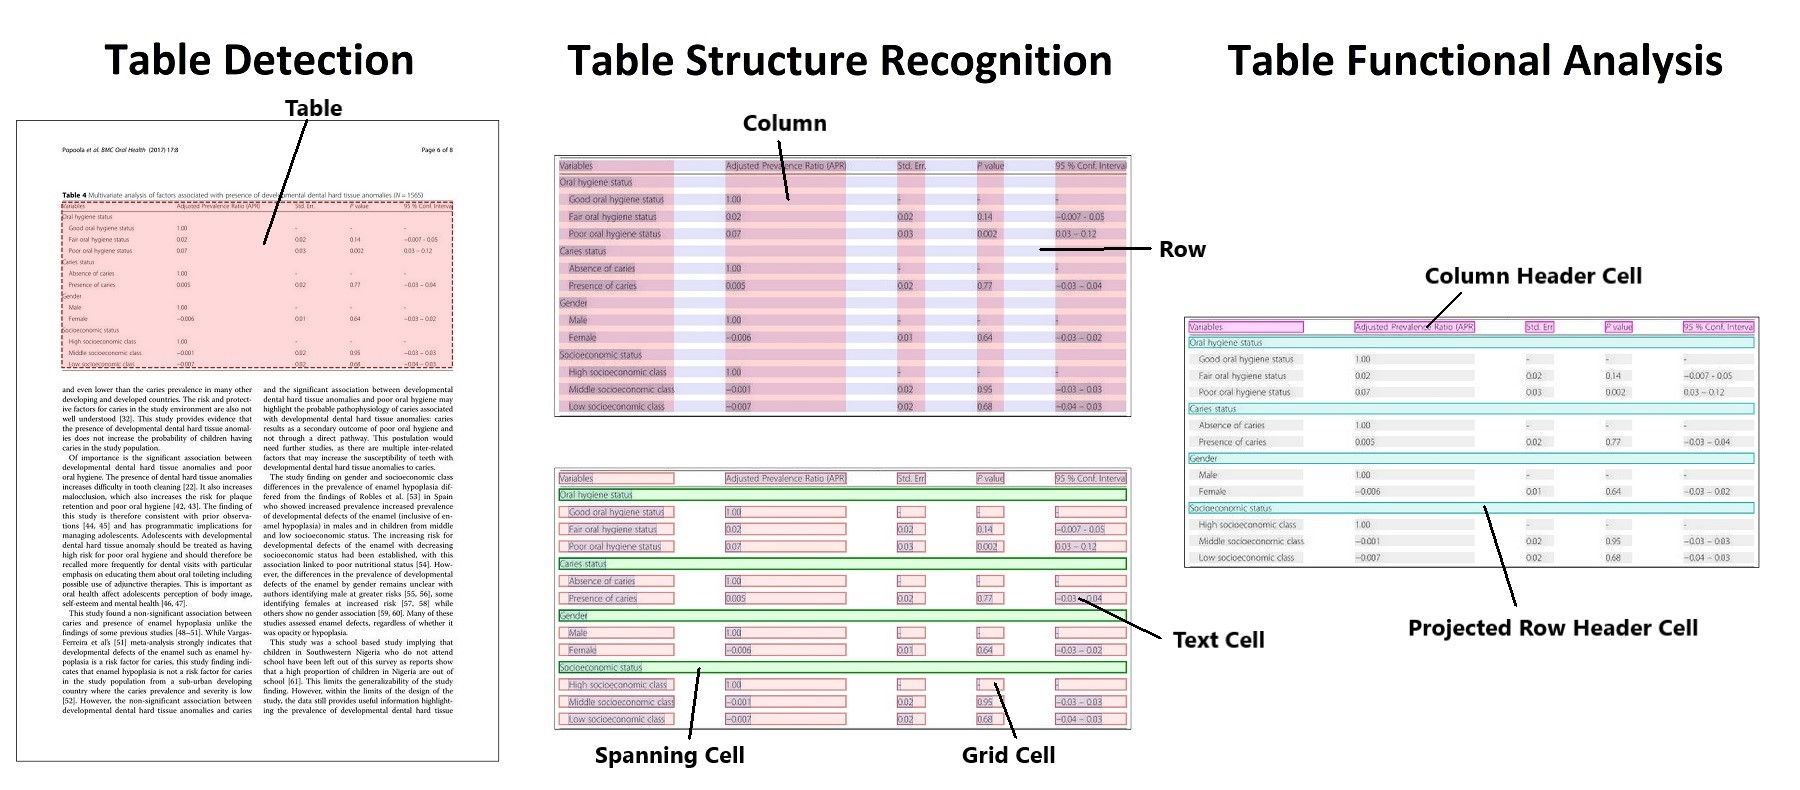

## Approach 1: LayoutLM

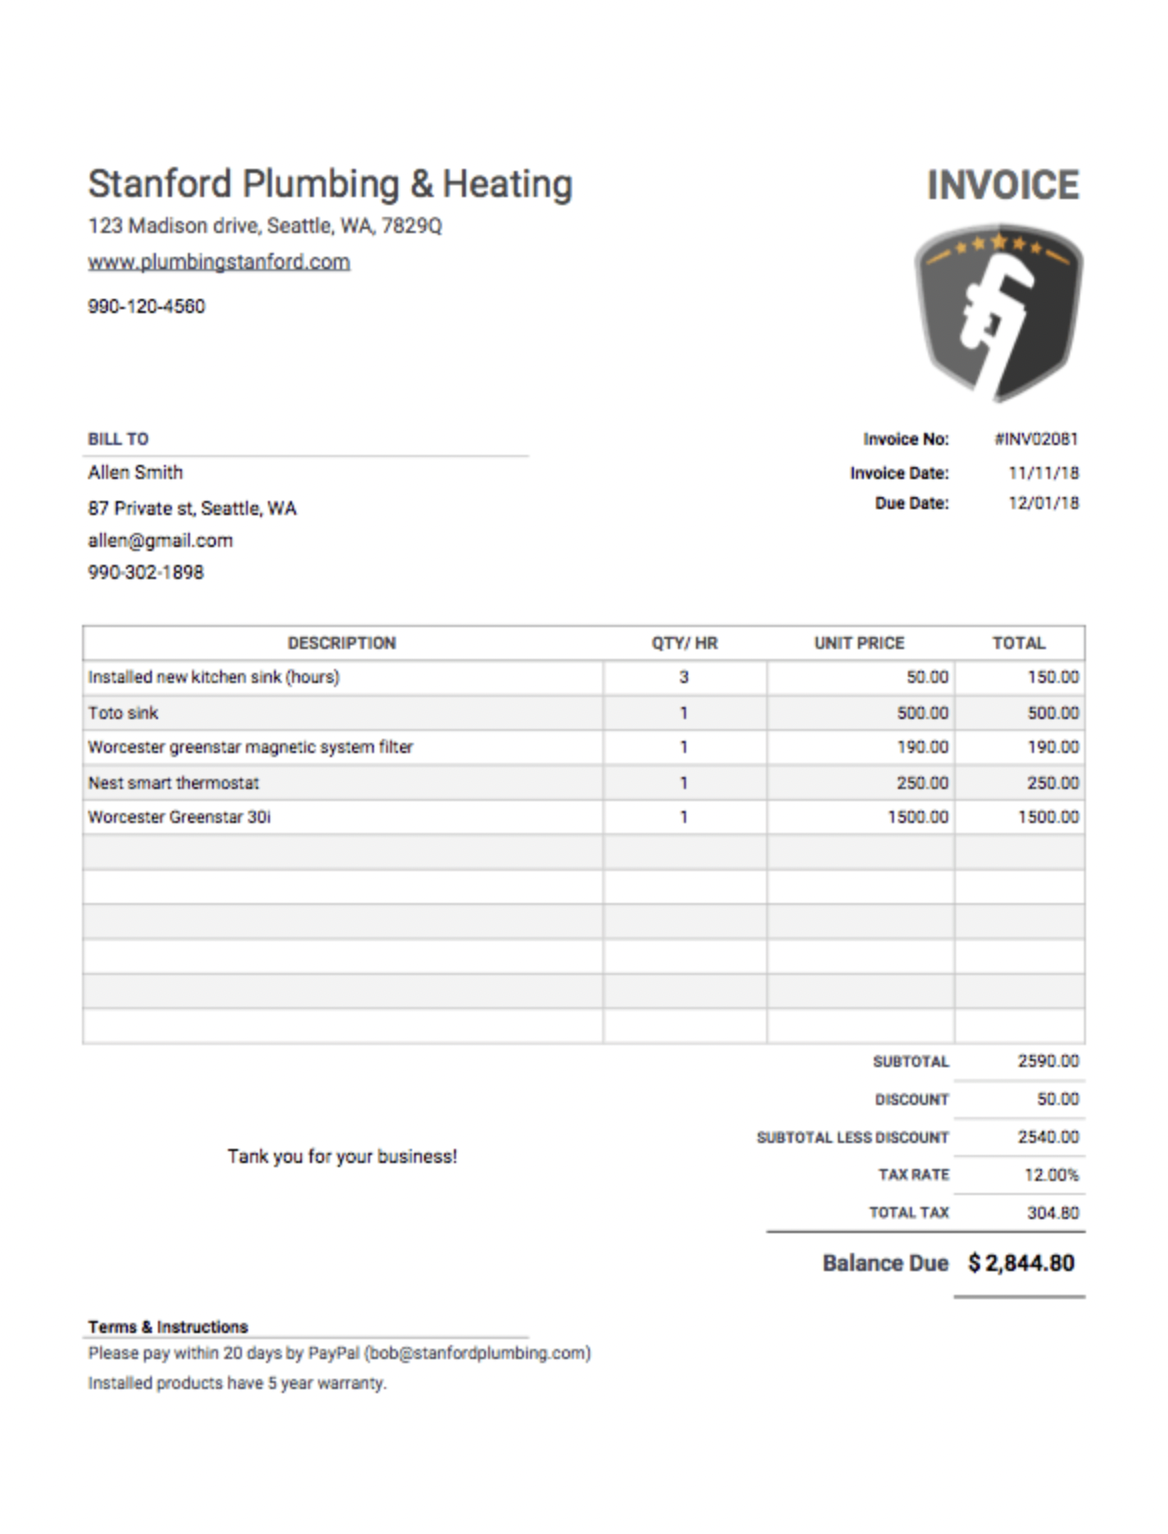

In [ ]:
!apt install -y tesseract-ocr
!apt install poppler-utils
!apt install libtesseract-dev
!pip install -q -U nltk pytesseract unstructured[all-docs] pydantic lxml timm #PDF related

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,483 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123614 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

**Restart your runtime now**

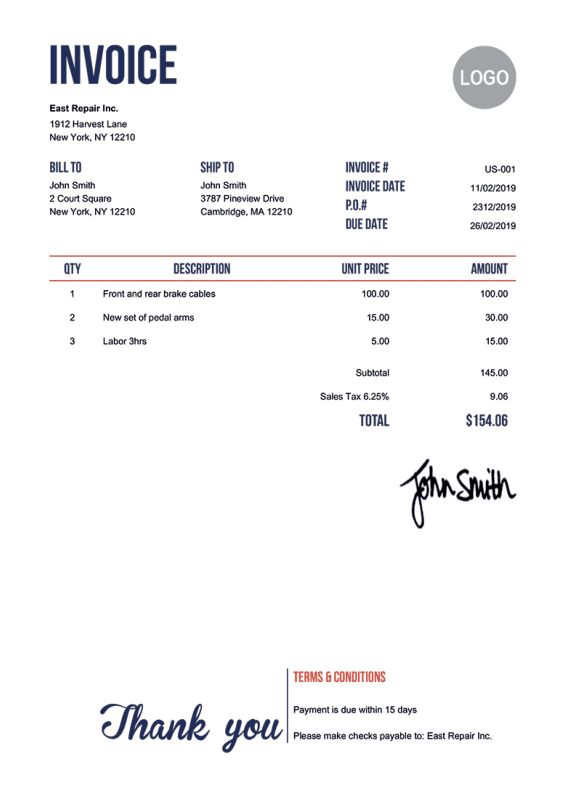

In [ ]:
from IPython.display import display
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

image_url = "https://templates.invoicehome.com/invoice-template-us-neat-750px.png"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
from transformers import pipeline
from PIL import Image
layoutlm = pipeline(model="impira/layoutlm-document-qa")

config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/511M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
layoutlm(image=image_url,question="What is the total amount due?")

[{'score': 0.9281525015830994, 'answer': '$154.06', 'start': 75, 'end': 75}]

In [ ]:
layoutlm(image=image_url,question="Who is this billed to")

[{'score': 0.9992370009422302, 'answer': 'John Smith', 'start': 17, 'end': 18}]

In [ ]:
layoutlm(image=image,question="What is the address of the biller")

[{'score': 0.4973336458206177,
  'answer': '2 Court Square 3787 Pineview Drive Pose New York, NY 12210',
  'start': 24,
  'end': 34}]

In [ ]:
layoutlm(image=image_url,question="What is the invoice date?")

[{'score': 0.9953235387802124, 'answer': '1110212019', 'start': 23, 'end': 23}]

## Approach 2: Donut DocVQA

In [ ]:
donutvqa = pipeline("document-question-answering", model="naver-clova-ix/donut-base-finetuned-docvqa")
#Ignore the warning 'Could not find image processor' class for now. Not FATAL.

In [ ]:
donutvqa(question="What is the invoice date?", image=image)

## Puttingthe models to use with Unstructured IO




In [ ]:
!gdown 1I8Ga_BK23OA8EEv3DtAmo5zw_Quud0ew

Downloading...
From: https://drive.google.com/uc?id=1I8Ga_BK23OA8EEv3DtAmo5zw_Quud0ew
To: /content/arso.pdf
100% 2.90M/2.90M [00:00<00:00, 200MB/s]


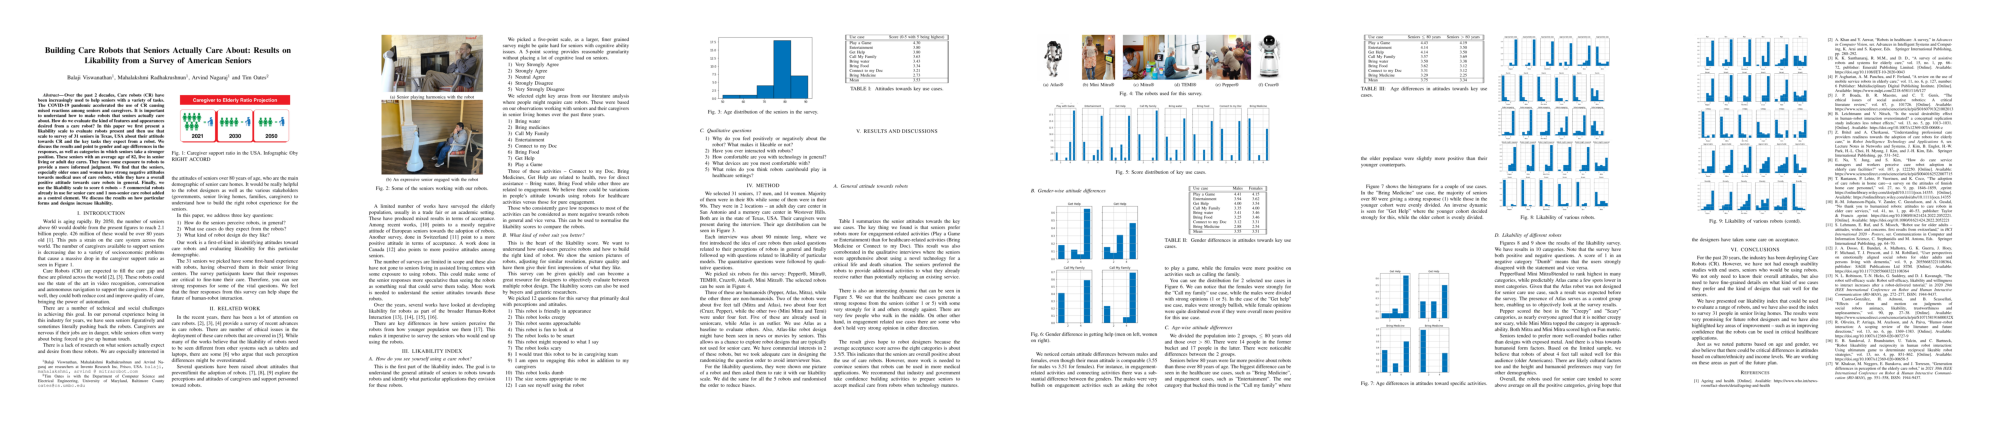

In [ ]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

pages = convert_from_path("arso.pdf", dpi=200)

num_pages_to_display = min(len(pages), 6)

fig, axes = plt.subplots(nrows=1, ncols=num_pages_to_display, figsize=(20, 15))

# Ensure axes is an iterable for the case of a single subplot
if num_pages_to_display == 1:
    axes = [axes]

for ax, page_image in zip(axes, pages[:num_pages_to_display]):
    ax.imshow(page_image)
    ax.axis('off')  # Hide axes for a cleaner visualization

plt.tight_layout()
plt.show()

In [ ]:
from unstructured.partition.pdf import partition_pdf

raw_pdf_elements = partition_pdf(
    filename="arso.pdf", # https://drive.google.com/file/d/1I8Ga_BK23OA8EEv3DtAmo5zw_Quud0ew/view?usp=sharing
    infer_table_structure=True,
)

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tables = [el for el in raw_pdf_elements if el.category == "Table"]
for table in tables:
    print("\n",table.text)


 Play a Game 4.30 Entertainment 3.80 Get Help 3.80 Call My Family 3.63 Bring water 3.43 Bring Food 3.34 Connect to my Doc 3.21 Bring Medicine 2.73 Mean 3.53

 Use case Play a Game Males 4.41 Females 4.15 Entertainment 3.94 3.62 Get Help 4.00 3.54 Call My Family 3.35 4.00 Bring water 3.41 3.46 Bring Food 3.25 3.46 Connect to my Doc 3.12 3.31 Bring Medicine 2.88 2.54 Mean 3.55 3.51

 Play a Game 4.43 4.19 Entertainment 4.14 3.50 Get Help 4.14 3.50 Call My Family 3.57 3.69 Bring water 3.50 3.38 Bring Food 3.62 3.12 Connect to my Doc 3.31 3.12 Bring Medicine 3.29 2.25 Mean 3.75 3.34


In [ ]:
titles = [el for el in raw_pdf_elements if el.category == "Title"]
for title in titles:
  print(title.category, title.text, title.metadata.page_number)

Title Building Care Robots that Seniors Actually Care About: Results on Likability from a Survey of American Seniors 1
Title I. INTRODUCTION 1
Title II. RELATED WORK 1
Title III. LIKABILITY INDEX 2
Title IV. METHOD 3
Title Use case 3
Title V. RESULTS AND DISCUSSIONS 3
Title (a) Atlas® 4
Title (b) Mini Mitra® 4
Title (c) Mitra® 4
Title (d) TEMI® 4
Title (e) Pepper® 4
Title (f) Cruzr® 4
Title Use case 5
Title VI. CONCLUSIONS 6
Title REFERENCES 6


In [ ]:
tables = [el for el in raw_pdf_elements if el.category == "Table"]
for table in tables:
  print(table.category, "Page number: ",table.metadata.page_number, table.metadata.coordinates)

Table Page number:  3 CoordinatesMetadata(points=((931.4716796875, 148.41552734375), (931.4716796875, 400.03997802734375), (1488.76806640625, 400.03997802734375), (1488.76806640625, 148.41552734375)), system=<unstructured.documents.coordinates.PixelSpace object at 0x786665d1bee0>)
Table Page number:  4 CoordinatesMetadata(points=((1009.6937866210938, 948.5054931640625), (1009.6937866210938, 1212.1168212890625), (1416.5552978515625, 1212.1168212890625), (1416.5552978515625, 948.5054931640625)), system=<unstructured.documents.coordinates.PixelSpace object at 0x786667a22f20>)
Table Page number:  5 CoordinatesMetadata(points=((164.36387634277344, 143.2136688232422), (164.36387634277344, 399.553466796875), (819.0381469726562, 399.553466796875), (819.0381469726562, 143.2136688232422)), system=<unstructured.documents.coordinates.PixelSpace object at 0x786667a23c70>)


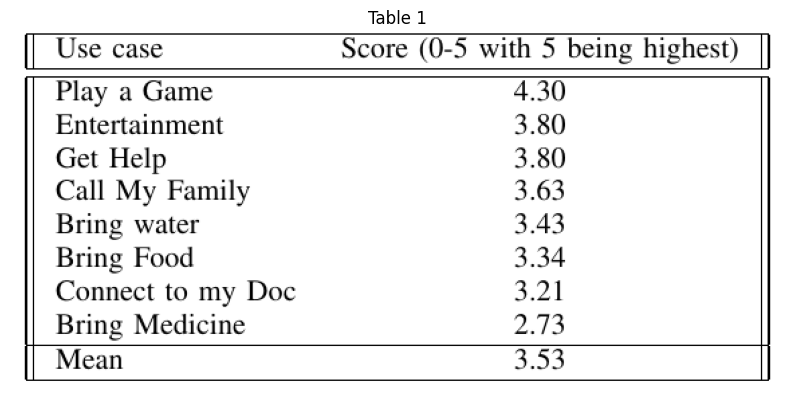

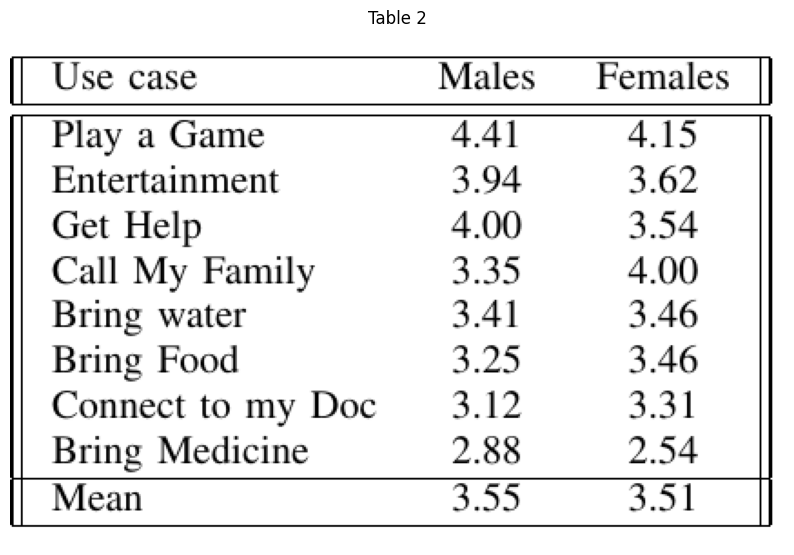

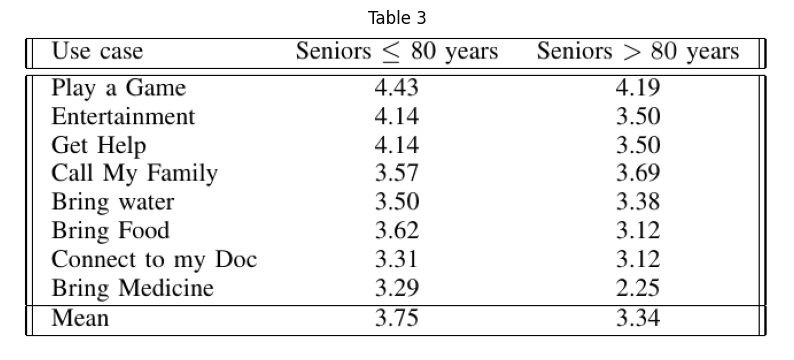

In [ ]:
for i, table in enumerate(tables):
    # Extracting coordinates and page number for the current table
    points = table.metadata.coordinates.points
    page_num = table.metadata.page_number - 1  # Adjusting for zero-based index
    page_image = pages[page_num]

    # Adding padding around the table region
    pad = 10
    left, upper = points[0][0] - pad, points[0][1] - pad
    right, lower = points[2][0] + pad, points[2][1] + pad

    # Crop the table region from the page image
    table_region = page_image.crop((left, upper, right, lower))

    # Display the cropped table region
    plt.figure(figsize=(10, 8))
    plt.imshow(table_region)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Table {i+1}")  # Title each figure with the table number
    plt.show()

In [ ]:
from IPython.display import HTML
html_table = tables[0].metadata.text_as_html
HTML(html_table)

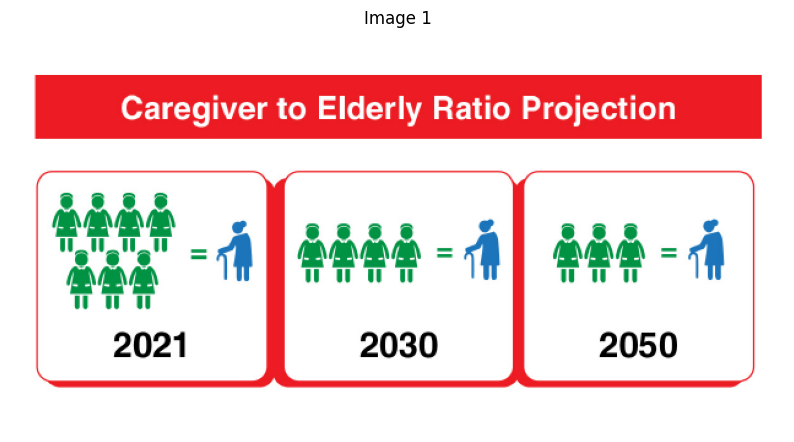

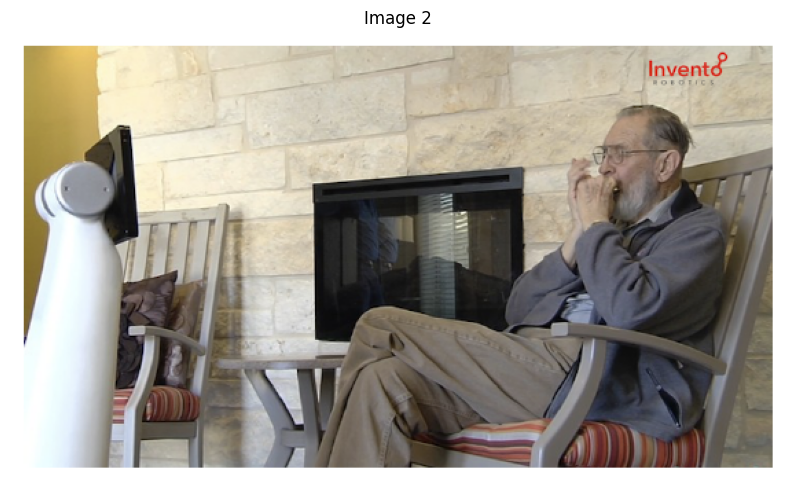

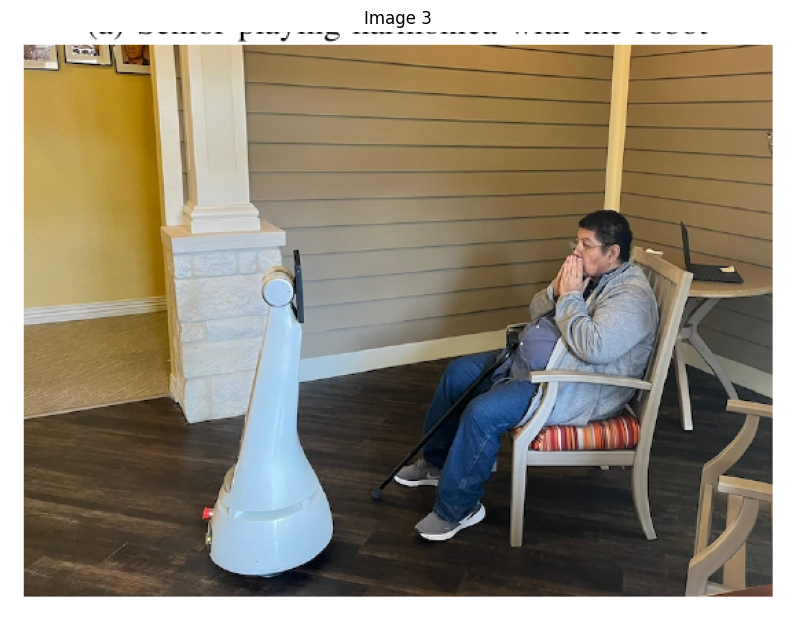

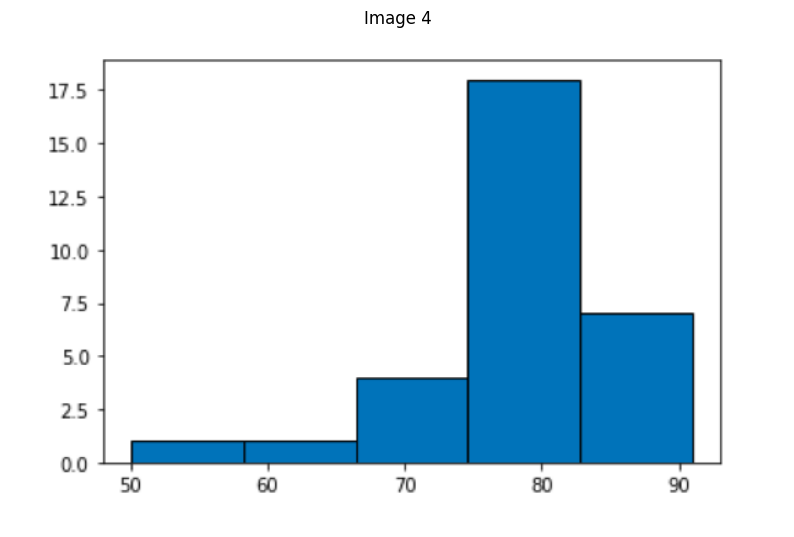

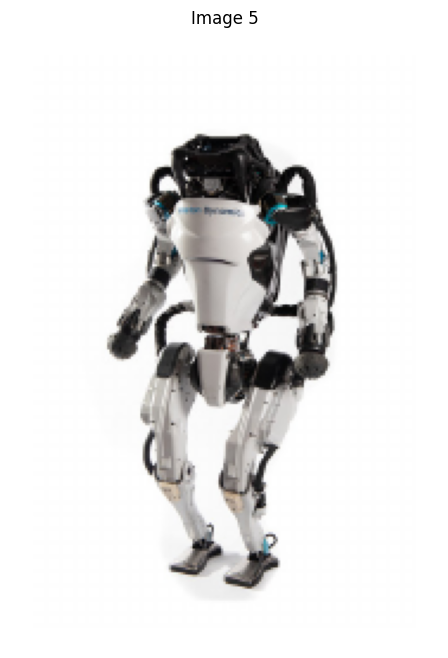

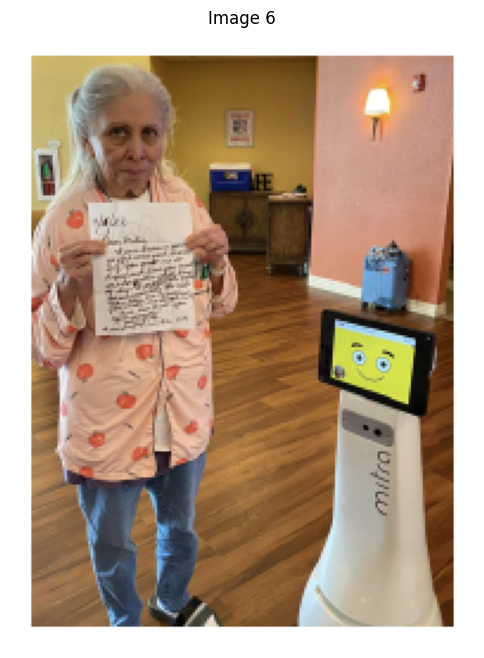

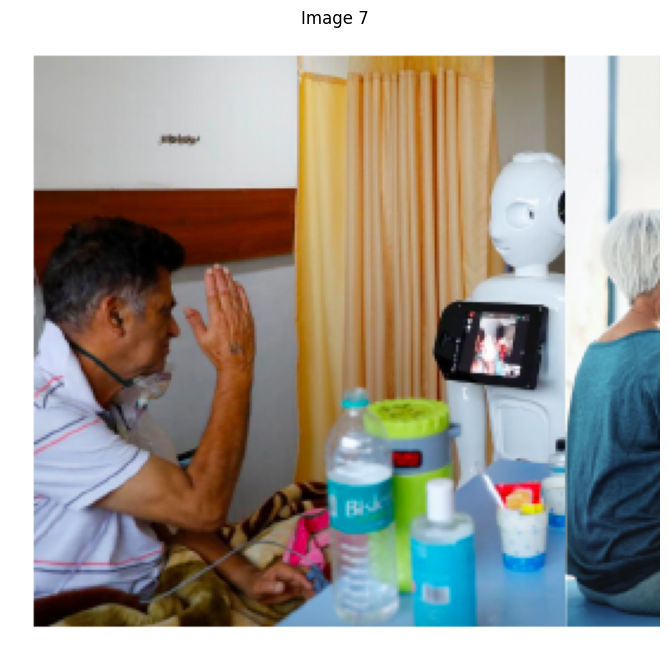

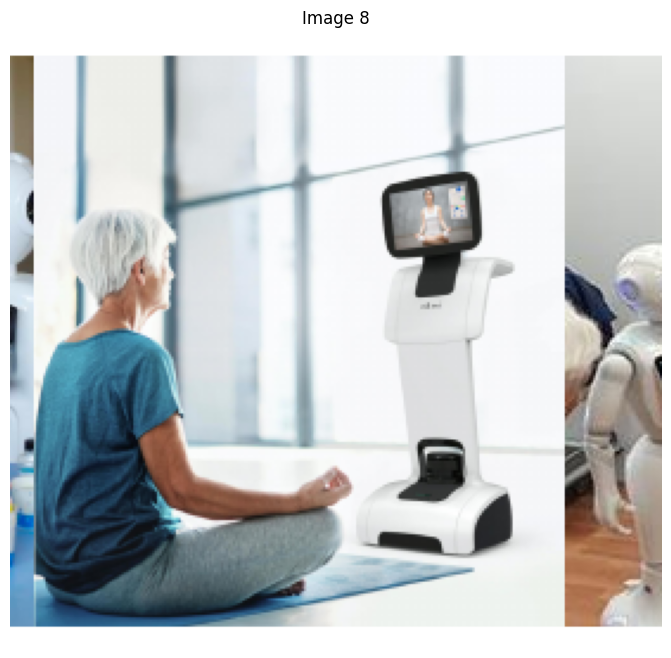

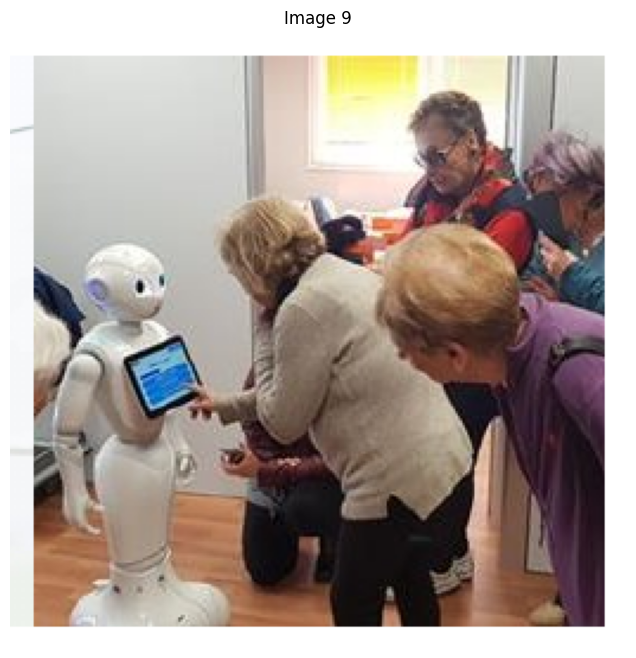

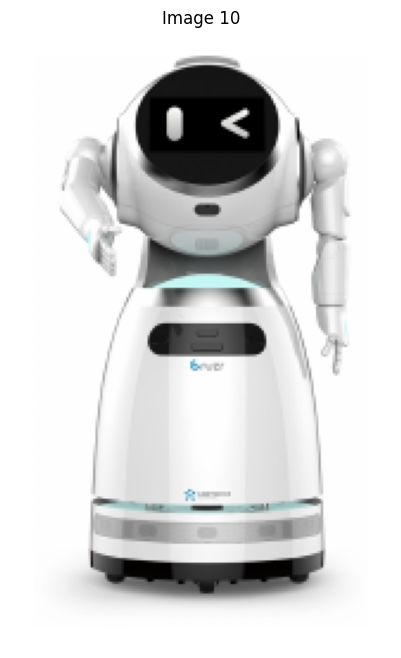

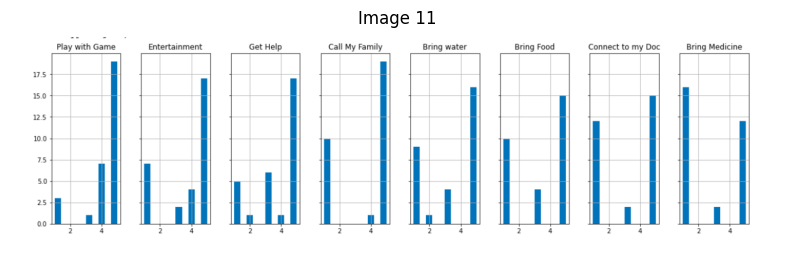

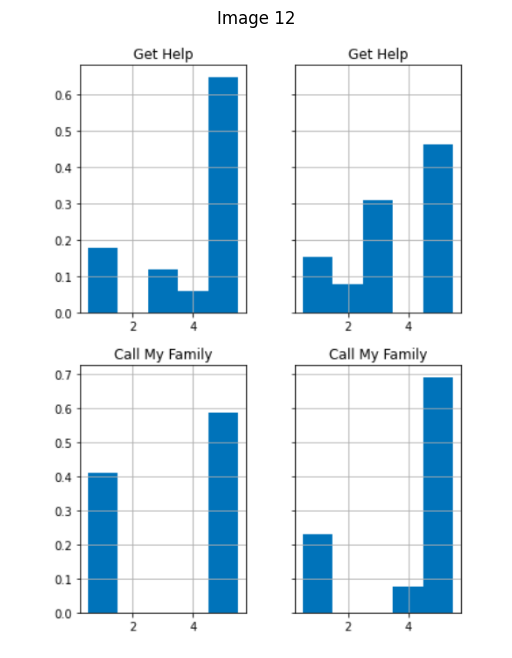

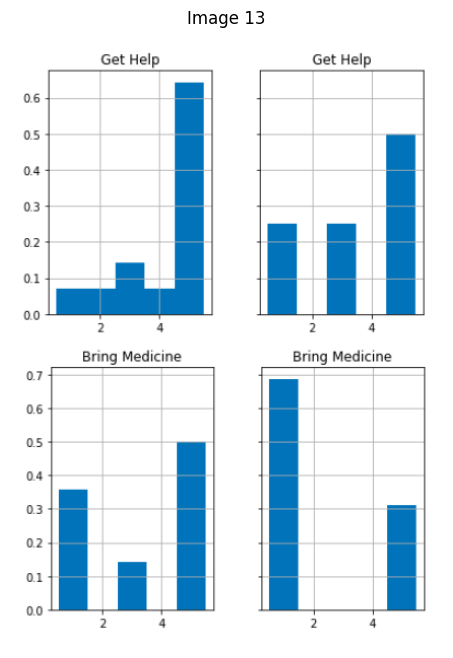

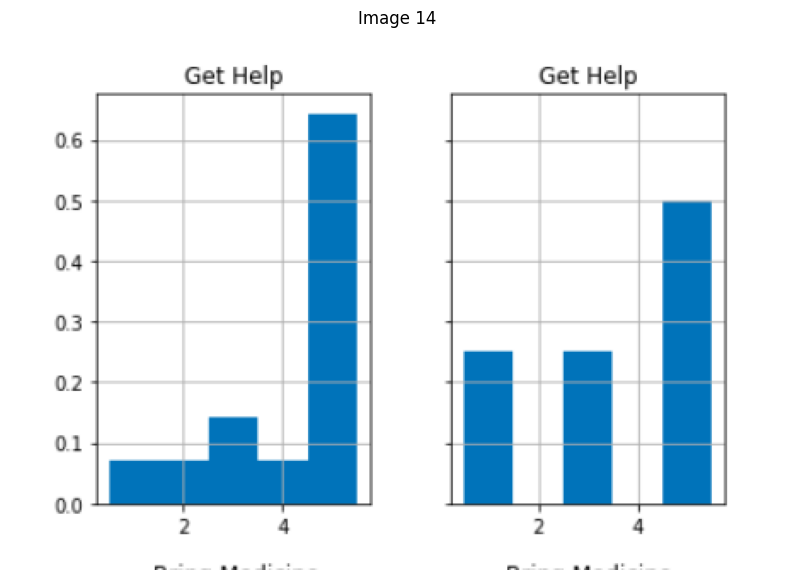

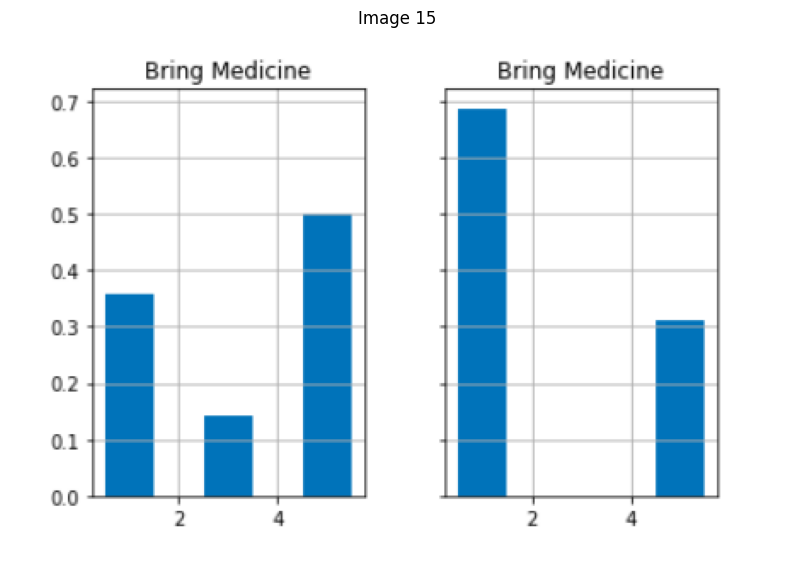

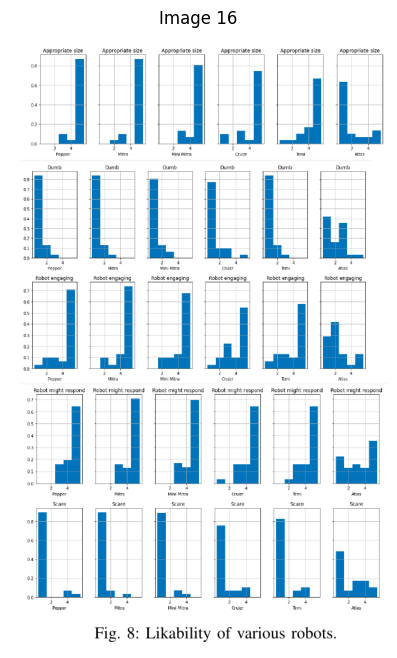

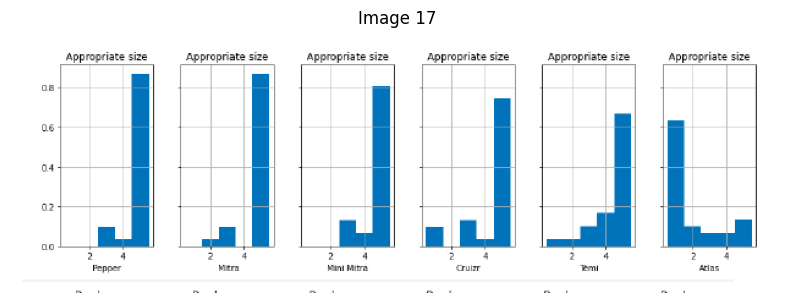

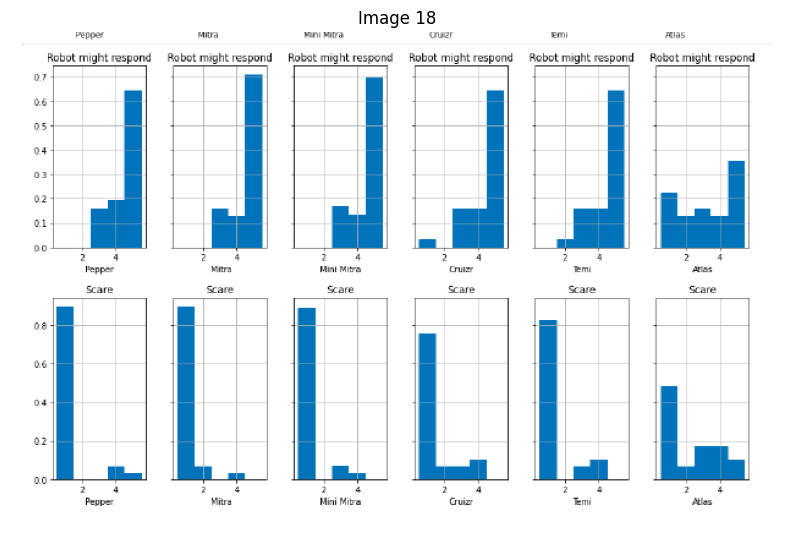

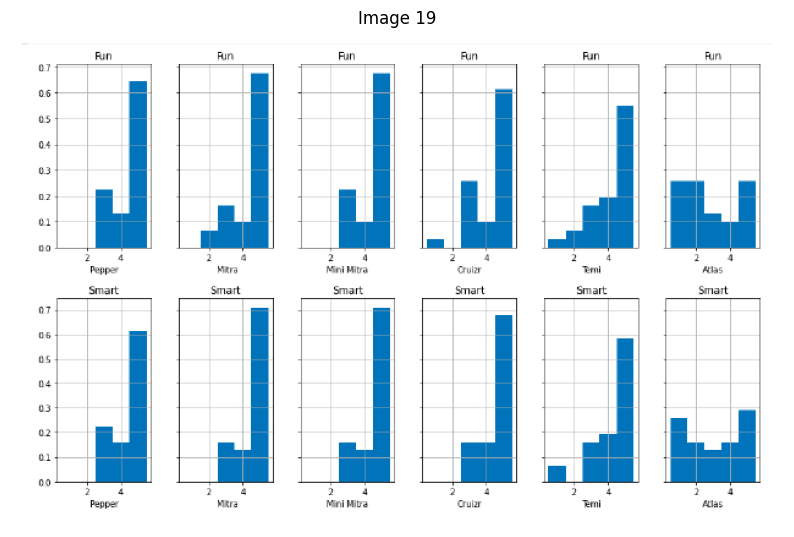

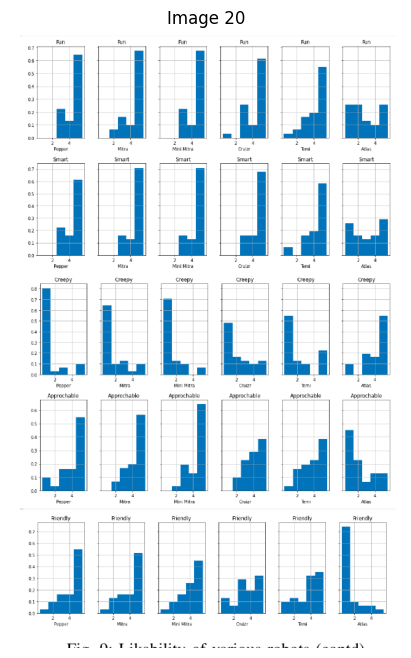

In [ ]:
images = [el for el in raw_pdf_elements if el.category == "Image"]
for i, img in enumerate(images):
    # Extracting coordinates and page number for the current table
    points = img.metadata.coordinates.points
    page_num = img.metadata.page_number - 1  # Adjusting for zero-based index
    page_image = pages[page_num]

    # Adding padding around the table region
    pad = 10
    left, upper = points[0][0] - pad, points[0][1] - pad
    right, lower = points[2][0] + pad, points[2][1] + pad

    # Crop the table region from the page image
    table_region = page_image.crop((left, upper, right, lower))

    # Display the cropped image region
    plt.figure(figsize=(10, 8))
    plt.imshow(table_region)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Image {i+1}")  # Title each figure with the Image number
    plt.show()

## Summarize the tables with LLM

In [ ]:
!pip install -U -q langchain-groq
from langchain_groq import ChatGroq
from google.colab import userdata
import os

os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")
llm = ChatGroq(model_name="llama3-70b-8192")

In [ ]:
for table in tables:
    print("**Summarizing the table**")
    query = "You are a document assistant. You will summarize the following table found in a research paper on robots. " + table.text
    print(llm.invoke(query).content)

**Summarizing the table**
The table appears to show the average ratings of various tasks that a robot can perform to assist humans. The ratings are on a scale from 1 to 5, with higher ratings indicating higher perceived usefulness or importance of the task. Here's a summary of the table:

The top-rated task is "Play a Game" with an average rating of 4.30, indicating that users find it very useful or enjoyable for a robot to play games with them. The next highest-rated tasks are "Get Help" and "Call My Family", both with average ratings around 3.80, suggesting that users value the robot's ability to provide assistance and facilitate communication with family members.

The tasks related to physical assistance, such as "Bring water" and "Bring Food", have average ratings around 3.40, indicating that users find these tasks moderately useful. The task "Connect to my Doc" has an average rating of 3.21, suggesting that users see some value in the robot's ability to connect them with a doctor 